# Test Lackey et al 2013 LAL implementation

MP 01/2016

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import lal
import lalsimulation as LS

In [3]:
q = 3 # eta > 6/49.
mNS = 1.35
M = (1. + q) * mNS
mBH = M - mNS
chi_BH = 0.5
Lambda = 2000

phiRef = 0
deltaF = 0.5
fLow = 10
fHigh = 4096
fRef = 10
distance = 100e6*lal.PC_SI 
inclination = pi/4
#inclination = pi/2
mBH_SI = mBH * lal.MSUN_SI
mNS_SI = mNS * lal.MSUN_SI

In [4]:
#freqs.data = np.array([10, 50, 100, 350, 900, 2000, 3500])
#freqs.data = np.linspace(10, 3500, n)

In [7]:
Hp, Hc = LS.SimIMRLackeyTidal2013(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, Lambda)
HpP, HcP = LS.SimIMRLackeyTidal2013(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0)

HpR, HcR = LS.SimIMRSEOBNRv2ROMDoubleSpinHI(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0, -1)

f = np.arange(Hp.data.length)*deltaF


# Create frequency sequence
f_in = f[20::4]
n = len(f_in)
freqs = lal.CreateREAL8Sequence(n)
freqs.data = f_in

HpS, HcS = LS.SimIMRLackeyTidal2013FrequencySequence(freqs, phiRef, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, Lambda)
HpRS, HcRS = LS.SimIMRSEOBNRv2ROMDoubleSpinHIFrequencySequence(freqs, phiRef, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0, -1)

h = Hp.data.data + 1j*Hc.data.data
hP = HpP.data.data + 1j*HcP.data.data
hS = HpS.data.data + 1j*HcS.data.data
hR = HpR.data.data + 1j*HcR.data.data
hRS = HpRS.data.data + 1j*HcRS.data.data

In [8]:
# sanity check: setting Lambda = 0 produces the unmodified ROM:
print np.allclose(hP, hR)

True


The amplitude between the FS and standard LAL version agrees.

* The core ROM function gets the correct inclination and distance in both cases
* The last frequency is never used in the standard interface to the ROMs and also to PhenomP
* The outputs agree exactly when comparing the same quantities at the same frequencies

In [9]:
HpR, HcR = LS.SimIMRSEOBNRv2ROMDoubleSpinHI(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0, -1)

# fLow, fHigh: 10 4096
# fHz, f, A, s*amp0: 10 0.000265977 2712.6 3.43658e-26
# fHz, f, A, s*amp0: 10.5 0.000279275 2561.99 3.43658e-26
# fHz, f, A, s*amp0: 11 0.000292574 2422.98 3.43658e-26
# fHz, f, A, s*amp0: 11.5 0.000305873 2302.48 3.43658e-26
# fHz, f, A, s*amp0: 12 0.000319172 2185.55 3.43658e-26
# fHz, f, A, s*amp0: 12.5 0.000332471 2086.75 3.43658e-26
# fHz, f, A, s*amp0: 13 0.000345769 1995.96 3.43658e-26
# [...]
# fHz, f, A, s*amp0: 4092.5 0.108851 0.399997 3.43658e-26
# fHz, f, A, s*amp0: 4093 0.108864 0.399353 3.43658e-26
# fHz, f, A, s*amp0: 4093.5 0.108877 0.398709 3.43658e-26
# fHz, f, A, s*amp0: 4094 0.108891 0.398066 3.43658e-26
# fHz, f, A, s*amp0: 4094.5 0.108904 0.397425 3.43658e-26
# fHz, f, A, s*amp0: 4095 0.108917 0.396784 3.43658e-26
# fHz, f, A, s*amp0: 4095.5 0.108931 0.396145 3.43658e-26

In [10]:
print f[20:30:4]
print abs(HpR.data.data[20:30:4])

[ 10.  12.  14.]
[  6.99156302e-23   5.63311178e-23   4.71480708e-23]


In [11]:
print f[-13:-1:4]
print abs(HpR.data.data[-13:-1:4])

[ 4090.  4092.  4094.]
[  1.03932311e-26   1.03263332e-26   1.02599015e-26]


In [12]:
HpRS, HcRS = LS.SimIMRSEOBNRv2ROMDoubleSpinHIFrequencySequence(freqs, phiRef, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0, -1)

# fLow, fHigh: 10 4096
# fHz, f, A, s*amp0: 10 0.000265977 2712.6 3.43658e-26
# fHz, f, A, s*amp0: 12 0.000319172 2185.55 3.43658e-26
# fHz, f, A, s*amp0: 14 0.000372367 1829.26 3.43658e-26
# fHz, f, A, s*amp0: 16 0.000425562 1563.06 3.43658e-26
# fHz, f, A, s*amp0: 18 0.000478758 1360.23 3.43658e-26
# fHz, f, A, s*amp0: 20 0.000531953 1202.77 3.43658e-26
# fHz, f, A, s*amp0: 22 0.000585148 1075.7 3.43658e-26
# fHz, f, A, s*amp0: 24 0.000638344 969.223 3.43658e-26
# [...]
# fHz, f, A, s*amp0: 4086 0.108678 0.408485 3.43658e-26
# fHz, f, A, s*amp0: 4088 0.108731 0.405853 3.43658e-26
# fHz, f, A, s*amp0: 4090 0.108784 0.403239 3.43658e-26
# fHz, f, A, s*amp0: 4092 0.108838 0.400644 3.43658e-26
# fHz, f, A, s*amp0: 4094 0.108891 0.398066 3.43658e-26
# fHz, f, A, s*amp0: 4096 0.108944 0.395507 3.43658e-26

In [13]:
print freqs.data[:3]
print abs(HpRS.data.data[:3])

[ 10.  12.  14.]
[  6.99156302e-23   5.63311178e-23   4.71480708e-23]


In [14]:
print freqs.data[-4:-1]
print abs(HpRS.data.data[-4:-1])

[ 4090.  4092.  4094.]
[  1.03932311e-26   1.03263332e-26   1.02599015e-26]


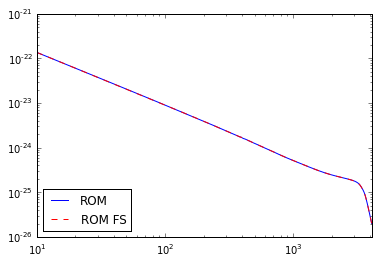

In [57]:
loglog(f, abs(hR), label='ROM')
loglog(freqs.data, abs(hRS), 'r--', label='ROM FS')
legend(loc=3)
xlim([fLow,fHigh]);

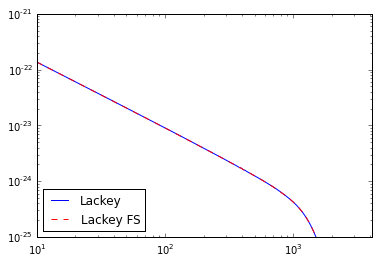

In [59]:
f = np.arange(Hp.data.length)*deltaF
loglog(f, abs(h), label='Lackey')
loglog(freqs.data, abs(hS), 'r--', label='Lackey FS')
legend(loc=3)
xlim([fLow,fHigh]);
ylim([1e-25, 1e-21]);

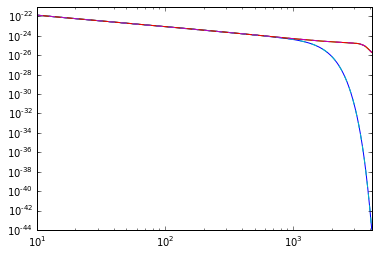

In [60]:
f = np.arange(Hp.data.length)*deltaF
loglog(f, abs(h))
loglog(f, abs(hP))
loglog(f, abs(hR))
loglog(freqs.data, abs(hS), '--')
loglog(freqs.data, abs(hRS), '--')
xlim([fLow,fHigh]);

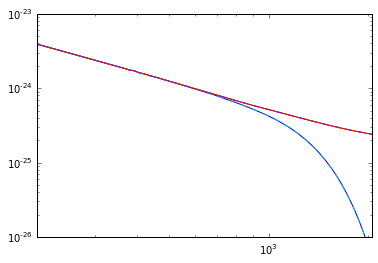

In [61]:
loglog(f, abs(h))
loglog(f, abs(hP))
loglog(f, abs(hR))
loglog(freqs.data, abs(hS), '--')
loglog(freqs.data, abs(hRS), '--')
xlim([200,2048]);
ylim([1e-26, 1e-23]);

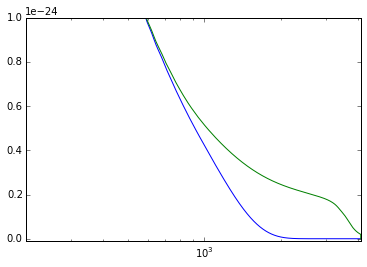

In [9]:
semilogx(f, abs(h))
semilogx(f, abs(hP))
xlim([200,fHigh]);
ylim([-0.1e-25,0.1e-23]);

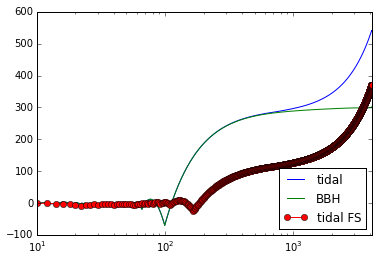

In [10]:
phi = unwrap(angle(h))
phiP = unwrap(angle(hP))
phiS = unwrap(angle(hS)) # phasing is different if the frequences are not the same

semilogx(f, phi, label='tidal')
semilogx(f, phiP, label='BBH')
semilogx(freqs.data, phiS, 'o-', label='tidal FS')
legend(loc='lower right')
xlim([fLow,fHigh]);

The tidal phasing should behave as in Fig. 8 of Lackey et al and fall off near merger:

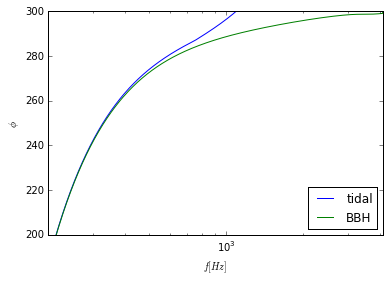

In [11]:
phi = unwrap(angle(h))
phiP = unwrap(angle(hP))
semilogx(f, phi, label='tidal')
semilogx(f, phiP, label='BBH')
legend(loc='lower right')
xlabel(r'$f [Hz]$')
ylabel(r'$\phi$')
xlim([200,fHigh]);
ylim([200,300]);

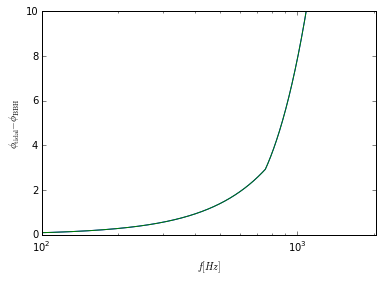

In [12]:
semilogx(f, phi - phiP)
semilogx(f, unwrap(angle(Hp.data.data) - angle(HpP.data.data)))
xlabel(r'$f [Hz]$')
ylabel(r'$\phi_\mathrm{tidal} - \phi_\mathrm{BBH}$')
xlim([100,2048]);
ylim([0,10]);

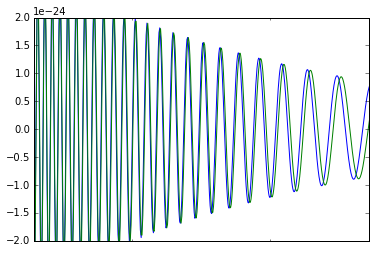

In [13]:
semilogx(f, real(Hp.data.data))
semilogx(f, real(HpP.data.data))
xlim([150,400]);
ylim([-0.2e-23,0.2e-23]);

## Read in Prayush's test data

In [14]:
sample_rate = 4096
time_length = 256 * 8
delta_f = 1./time_length
N = sample_rate * time_length
f_lower = 15.

Mmin, Mmax = [1.35, 5*1.35]
etamin, etamax = 5./36., 2./9.
smin, smax = -0.5, 0.75
tLambda = 600.

In [67]:
# 1 Frequency [Hz]
# 2 Real[h22]
# 3 Imag[h22]
#data = loadtxt('testLackey/Lackey_M4.00_Et0.20_S0.50_L600.0_f15.0.dat.gz')
#data = loadtxt('testLackey/Lackey_M6.75_Et0.16_S0.50_L600.0_f15.0.dat.gz')
data = loadtxt('testLackey/Lackey_M9.45_Et0.12_S0.50_L600.0_f15.0.dat.gz')
fPy = data.T[0]
hPy = data.T[1]+1j*data.T[2]

In [25]:
def etafun(q):
    return q/(1.0 + q)**2

def qfun(eta):
    return (1.0 + np.sqrt(1.0 - 4.0*eta) - 2.0*eta) / (2.0*eta)

In [90]:
q = 6.0
M = 9.45
chi_BH = 0.5
Lambda = 600
mBH = M*q/(1. + q)
mNS = M*1.0/(1. + q)

print mBH, mNS

phiRef = 0
deltaF = 0.05
fLow = 15
fHigh = 6500
fRef = 15
distance = 10e6*lal.PC_SI 
inclination = pi/4

mBH_SI = mBH * lal.MSUN_SI
mNS_SI = mNS * lal.MSUN_SI

Hp, Hc = LS.SimIMRLackeyTidal2013(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, Lambda)
h = Hp.data.data + 1j*Hc.data.data
f = np.arange(Hp.data.length)*deltaF

np.allclose(fPy, f)

8.1 1.35


True

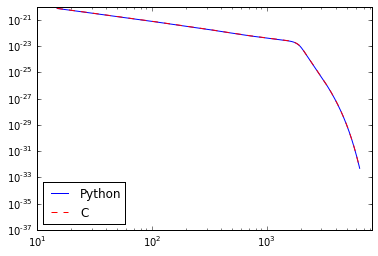

In [105]:
loglog(fPy, abs(hPy), label='Python')
loglog(f, 7*abs(h), 'r--', label='C')
legend(loc=3)
xlim([10, 8192]);
ylim([1e-37, 1e-20]);
savefig('amp.png')

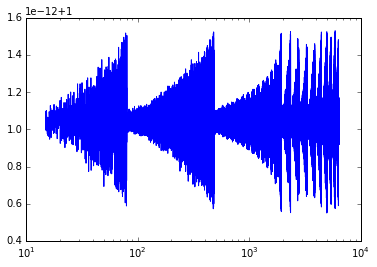

In [102]:
mask = abs(hPy) > 0
amp_frac = abs(h)[mask]/abs(hPy)[mask]
semilogx(f[mask], amp_frac / amp_frac[0])
savefig('amp_err.png')

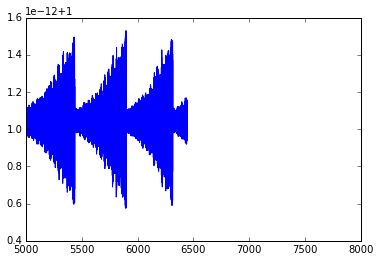

In [96]:
mask = abs(hPy) > 0
amp_frac = abs(h)[mask]/abs(hPy)[mask]
plot(f[mask], amp_frac / amp_frac[0])
xlim([5000, 8000]);

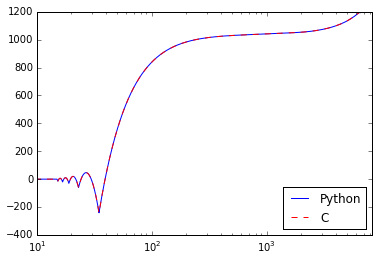

In [104]:
phiPy = unwrap(angle(hPy))
phi = unwrap(angle(h))
semilogx(fPy, phiPy, label='Python')
semilogx(f, phi, 'r--', label='C')
legend(loc=4)
xlim([10, 8192]);
savefig('phasing.png')

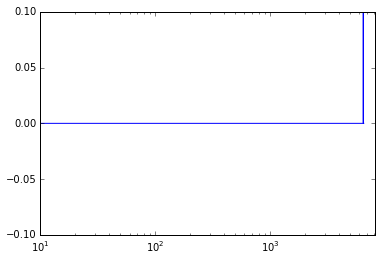

In [98]:
dphi = phi-phiPy
semilogx(f, dphi)
xlim([10, 8192]);
ylim([-0.1,0.1]);

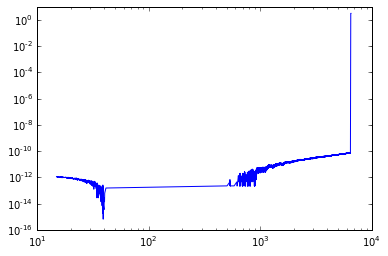

In [103]:
mask = dphi > 0
loglog(f[mask], dphi[mask])
savefig('phase_err.png')

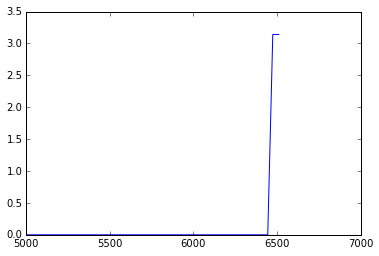

In [101]:
mask = dphi > 0
plot(f[mask], dphi[mask])
xlim([5000, 7000]);

In [86]:
print fPy[50000], f[50000]
print hPy[50000], h[50000]

2500.0 2500.0
(4.06315481957e-25-1.97963670499e-25j) (5.92045044067e-26-2.88454206699e-26j)


### Read in amplitude - phase test data

In [10]:
# 1 Frequency [Hz]
# 2 Real[h22]
# 3 Imag[h22]
data = loadtxt('testLackey/Lackey_amp_phi_M4.00_Et0.20_S0.50_L600.0_f15.0.dat.gz')
fPy = data.T[0]
APy = data.T[1]
PhiPy = data.T[2]
shape(data)

(524289, 3)

Use hacked C code that returns amp, phi corrections in hp, hc

In [11]:
def etafun(q):
    return q/(1.0 + q)**2

def qfun(eta):
    return (1.0 + np.sqrt(1.0 - 4.0*eta) - 2.0*eta) / (2.0*eta)

In [16]:
q = qfun(0.2)
M = 4.0
chi_BH = 0.5
Lambda = 600
mBH = M*q/(1. + q)
mNS = M*1.0/(1. + q)

phiRef = 0
deltaF = 0.05
fLow = 15
fHigh = 16384
fRef = 15
distance = 10e6*lal.PC_SI 
inclination = pi/4

mBH_SI = mBH * lal.MSUN_SI
mNS_SI = mNS * lal.MSUN_SI

Hp, Hc = LS.SimIMRLackeyTidal2013(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, Lambda)
amp = Hp.data.data
phi = Hc.data.data
f = np.arange(Hp.data.length)*deltaF

In [17]:
np.allclose(f,fPy)

True

In [18]:
np.allclose(APy,amp)

False

/usr/local/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


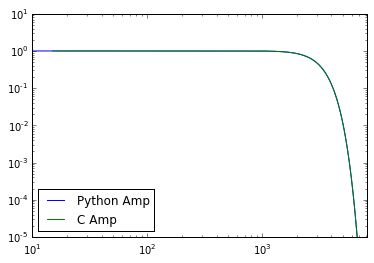

In [19]:
loglog(fPy, APy, label='Python Amp')
loglog(f, amp, label='C Amp')
legend(loc=3)
xlim([10, 8192]);
ylim([1e-5,10]);

In [20]:
amp[0:4]

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j])

In [21]:
APy[0:4]

array([ 1.,  1.,  1.,  1.])

In [22]:
amp[0] = 1
np.allclose(APy,amp)

False

In [28]:
f[-1]

26214.400000000001

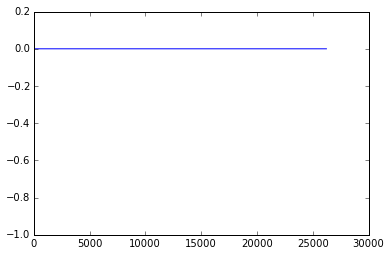

In [27]:
plot(f, amp - APy)

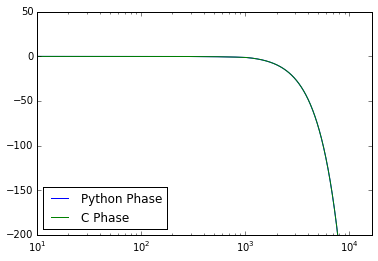

In [24]:
semilogx(fPy, PhiPy, label='Python Phase')
semilogx(f, phi, label='C Phase')
legend(loc=3)
xlim([10, 16384]);
ylim([-200,50]);

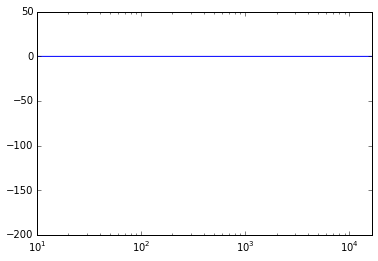

In [25]:
semilogx(f, PhiPy-phi)
xlim([10, 16384]);
ylim([-200,50]);

In [ ]:
C:
tidalCorrectionAmplitude: dmf, B, C, Lambda: 0.00083608 3.09814e-08 53.01 600
tidalCorrectionAmplitude: dmf, B, C, Lambda: 0.00182118 3.20195e-07 53.01 600
        
Py:
tidalCorrectionAmplitude: mf-mfA, B, C, D, Lambda: 0.000836080256196 3.09814192082e-08 53.0099512423 3.0 600.0
tidalCorrectionAmplitude: mf-mfA, B, C, D, Lambda: 0.0018211784613 3.20195276422e-07 53.0099512423 3.0 600.0

In [ ]:
C:
tidalPNPhaseCoefficients: a0, a1, G: -752.947 -1723.17 6.487
tidalPNPhaseCoefficients: g0, g1, g2, g3, eta, chiBH: -4.6339 27.719 10.268 -41.741 0.2 0.5
        
Py:
tidalCorrectionPhase: a0, a1, G: -752.946585265 -1723.17014568 6.48699886976
tidalCorrectionPhase: g0, g1, g2, g3, eta, sBH -4.6339 27.719 10.268 -41.741 0.2 0.5

In [ ]:
C:
mfP, E: 0.02 3.47033e-05
psiT, DpsiT: -1.19315 -0.0755722
mfP, E: 0.02 0.000152818
psiT, DpsiT: -1.19315 -0.183926
    
Py:
mfP, E 0.02 3.47032936193e-05
psiT, DpsiT -1.26987534248 -113.359286298
mfP, E 0.02 0.000152817736028
psiT, DpsiT -1.38392297231 -118.186736655

    psiT, DpsiT disagree


In [ ]:
C:
mf, v: 0.000985098 0.145728
mf, v: 0.0019702 0.183606
    
mf, v: 0.0206871 0.402053
mfP, E: 0.02 3.47033e-05
psiT, DpsiT: -1.26988 -0.0778849
    
Py:
v 0.402052621695
mfP, E 0.02 3.47032936193e-05
psiT, DpsiT -1.26987534248 -113.359286298